In [23]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Reading Data

In [3]:
train_data = pd.read_csv('data/train.csv',index_col='Id')

# train_data['Electrical'].describe().top

# train_data['LotFrontage'] = train_data['LotFrontage'].fillna(value=np.random.randint(low=59,high=80))
# train_data = train_data.dropna(axis=0,subset=['MasVnrArea','Electrical'])
# train_data.dropna(axis=0,subset='MasVnrArea')



# train_data['MasVnrArea'].describe()


LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [43]:
def Preparing_Data(train_data = pd.DataFrame):
#### MSSubClass    
    train_data['MSSubClass'] /= 10 
    train_data['MSSubClass'] -= train_data['MSSubClass'].mean()

#### MSZoning
    train_data['MSZoning'][train_data['MSZoning']=='A'] = 4
    train_data['MSZoning'][train_data['MSZoning']=='C'] = 5
    train_data['MSZoning'][train_data['MSZoning']=='FV'] = 6
    train_data['MSZoning'][train_data['MSZoning']=='RH'] = 7
    train_data['MSZoning'][train_data['MSZoning']=='RL'] = 0
    train_data['MSZoning'][train_data['MSZoning']=='RP'] = 1
    train_data['MSZoning'][train_data['MSZoning']=='RM'] = 2
    train_data['MSZoning'][train_data['MSZoning']=='I'] = 3
    

#### GarageType
    train_data['GarageType'] = train_data['GarageType'].fillna(value='No Garage')

#### GarageType 
# GarageYrBlt 81
# GarageFinish 81
# GarageQual 81
# GarageCond 81
#### GarageType
#### GarageType


#### LotFrontage
    train_data['LotFrontage'] = train_data['LotFrontage'].fillna(value=np.random.randint(low=59,high=80))
    train_data['LotFrontage'] /= 10 
    train_data['LotFrontage'] -= train_data['LotFrontage'].mean()

#### BsmtQual
    train_data['BsmtQual'] = train_data['BsmtQual'].fillna(value='No Basement')

#### BsmtCond
    train_data['BsmtCond'] = train_data['BsmtCond'].fillna(value='No Basement')

#### BsmtExposure
    train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(value='No Basement')


#### BsmtFinType1
    train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna(value='No Basement')


#### BsmtFinType2
    train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna(value='No Basement')


#### LotArea
    train_data['LotArea'] = np.log(train_data['LotArea'])
    train_data['LotArea'] -= train_data['LotArea'].mean()


#### Street
    train_data['Street'][train_data['Street']=='Grvl'] = 0
    train_data['Street'][train_data['Street']=='Pave'] = 1


#### Alley
    train_data['Alley'] = train_data['Alley'].fillna(value=0)
    train_data['Alley'][train_data['Alley']=='Grvl'] = 1
    train_data['Alley'][train_data['Alley']=='Pave'] = -1


#### MasVnrArea
    train_data = train_data.dropna(axis=0,subset=['MasVnrArea'])

#### MasVnrArea
    train_data = train_data.dropna(axis=0,subset=['MasVnrType'])

#### MasVnrArea
    train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna(value='No Fireplace')
    
#### LotShape
    train_data['LotShape'][train_data['LotShape']=='Reg'] = -1
    train_data['LotShape'][train_data['LotShape']=='IR1'] = 0
    train_data['LotShape'][train_data['LotShape']=='IR2'] = 1
    train_data['LotShape'][train_data['LotShape']=='IR3'] = 2

#### LandContour    
    train_data['LandContour'][train_data['LandContour']=='Lvl'] = -1
    train_data['LandContour'][train_data['LandContour']=='Bnk'] = 0
    train_data['LandContour'][train_data['LandContour']=='HLS'] = 1
    train_data['LandContour'][train_data['LandContour']=='Low'] = 2

#### Utilities    
    train_data['Utilities'][train_data['Utilities']=='AllPub'] = -1
    train_data['Utilities'][train_data['Utilities']=='NoSewr'] = 0
    train_data['Utilities'][train_data['Utilities']=='NoSeWa'] = 1
    train_data['Utilities'][train_data['Utilities']=='ELO'] = 2

#### LotConfig
    train_data['LotConfig'][train_data['LotConfig']=='Inside'] = -2
    train_data['LotConfig'][train_data['LotConfig']=='Corner'] = -1
    train_data['LotConfig'][train_data['LotConfig']=='CulDSac'] = 0
    train_data['LotConfig'][train_data['LotConfig']=='FR2'] = 1
    train_data['LotConfig'][train_data['LotConfig']=='FR3'] = 2

#### LandSlope
    train_data['LandSlope'][train_data['LandSlope']=='Gtl'] = -1
    train_data['LandSlope'][train_data['LandSlope']=='Mod'] = 0
    train_data['LandSlope'][train_data['LandSlope']=='Sev'] = 1

#### Electrical
    train_data['Electrical'] = train_data['Electrical'].fillna(value = train_data['Electrical'].describe().top)
    


#### Neighborhood
    train_data['Neighborhood'][train_data['Neighborhood']=='Blmngtn'] = -1



#### Condition2
    train_data['Condition1'][train_data['Condition1']=='Artery'] = -4
    train_data['Condition1'][train_data['Condition1']=='Feedr'] = -3
    train_data['Condition1'][train_data['Condition1']=='Norm'] = -2
    train_data['Condition1'][train_data['Condition1']=='RRNn'] = -1
    train_data['Condition1'][train_data['Condition1']=='RRAn'] = 0
    train_data['Condition1'][train_data['Condition1']=='PosN'] = 1
    train_data['Condition1'][train_data['Condition1']=='PosA'] = 2
    train_data['Condition1'][train_data['Condition1']=='RRNe'] = 3
    train_data['Condition1'][train_data['Condition1']=='RRAe'] = 4

#### Condition2
    train_data['Condition2'][train_data['Condition2']=='Artery'] = -4
    train_data['Condition2'][train_data['Condition2']=='Feedr'] = -3
    train_data['Condition2'][train_data['Condition2']=='Norm'] = -2
    train_data['Condition2'][train_data['Condition2']=='RRNn'] = -1
    train_data['Condition2'][train_data['Condition2']=='RRAn'] = 0
    train_data['Condition2'][train_data['Condition2']=='PosN'] = 1
    train_data['Condition2'][train_data['Condition2']=='PosA'] = 2
    train_data['Condition2'][train_data['Condition2']=='RRNe'] = 3
    train_data['Condition2'][train_data['Condition2']=='RRAe'] = 4


#### BldgType
    train_data['BldgType'][train_data['BldgType']=='1Fam'] = 2
    train_data['BldgType'][train_data['BldgType']=='2FmCon'] = 1
    train_data['BldgType'][train_data['BldgType']=='Duplx'] = 0
    train_data['BldgType'][train_data['BldgType']=='TwnhsE'] = -1
    train_data['BldgType'][train_data['BldgType']=='TwnhsI'] = -2



#### HouseStyle
    train_data['HouseStyle'][train_data['HouseStyle']=='1Story'] = 0
    train_data['HouseStyle'][train_data['HouseStyle']=='1.5Fin'] = -1
    train_data['HouseStyle'][train_data['HouseStyle']=='1.5Unf'] = 1
    train_data['HouseStyle'][train_data['HouseStyle']=='2Story'] = 2
    train_data['HouseStyle'][train_data['HouseStyle']=='2.5Fin'] = -2
    train_data['HouseStyle'][train_data['HouseStyle']=='2.5Unf'] = 3
    train_data['HouseStyle'][train_data['HouseStyle']=='SFoyer'] = -3
    train_data['HouseStyle'][train_data['HouseStyle']=='SLvl']   = 4

#### OverallQual
    train_data['OverallQual'] -= train_data['OverallQual'].mean()



#### OverallCond
    train_data['OverallCond'] -= train_data['OverallCond'].mean()
    
#### YearBuilt
    last_year = train_data['YearBuilt'].max()
    train_data['YearBuilt'] = last_year - train_data['YearBuilt']


#### YearRemodAdd
    train_data['YearRemodAdd'] = last_year - train_data['YearRemodAdd']
    train_data['YearRemodAdd'][train_data['YearRemodAdd']<train_data['YearBuilt']] = 1
    train_data['YearRemodAdd'][train_data['YearRemodAdd']>=train_data['YearBuilt']] = 0





    return train_data
    






In [44]:
train_data = pd.read_csv('data/train.csv',index_col='Id')
train_data = Preparing_Data(train_data=train_data)
print(train_data['YearBuilt'])
print(train_data['YearRemodAdd'])
column_list = train_data.columns.tolist()
for column in column_list:
    if train_data[column].isnull().any() == True:
        print(column, train_data[column].isna().sum())

Id
1       2003
2       1976
3       2001
4       1915
5       2000
        ... 
1456    1999
1457    1978
1458    1941
1459    1950
1460    1965
Name: YearBuilt, Length: 1452, dtype: int64
Id
1       2003
2       1976
3       2002
4       1970
5       2000
        ... 
1456    2000
1457    1988
1458    2006
1459    1996
1460    1965
Name: YearRemodAdd, Length: 1452, dtype: int64
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1445
Fence 1171
MiscFeature 1398


(array([605.,   4., 156., 299.,  60.,  74.,  72.,   0.,   0.,  87.,   0.,
          0.,   0.,  63.,   0.,  40.]),
 array([ 20.   ,  30.625,  41.25 ,  51.875,  62.5  ,  73.125,  83.75 ,
         94.375, 105.   , 115.625, 126.25 , 136.875, 147.5  , 158.125,
        168.75 , 179.375, 190.   ]),
 <BarContainer object of 16 artists>)

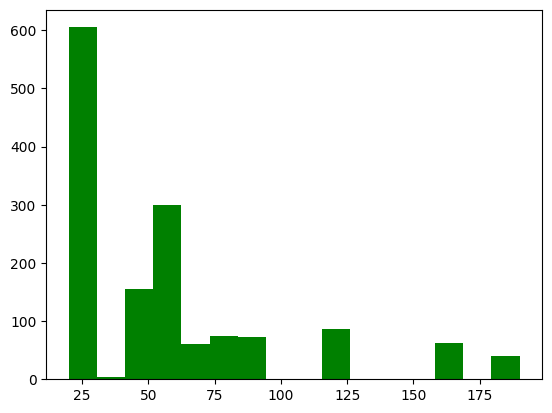

In [7]:

plt.hist(train_data['MSSubClass'],color='green',bins=16)

In [8]:
train_data.corr(method='pearson')

C:\Users\Mahsa-PC\AppData\Local\Temp\ipykernel_8768\778766375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr(method='pearson')


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
